<a href="https://colab.research.google.com/github/koushikreddy30-26/ML-tasks/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Load the dataset
df_movies = pd.read_csv('/content/train_data.txt', sep='\t')

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df_movies.head())
print("\nDataFrame Info:")
df_movies.info()

First 5 rows of the DataFrame:
  1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.
0  2 ::: Cupid (1997) ::: thriller ::: A brother ...                                                                                                                                                                                                                                                                                                                                

In [13]:
import pandas as pd
df_movies = pd.read_csv('/content/train_data.txt', sep='\t', header=None)
df_movies = df_movies[0].str.split(' ::: ', expand=True)

# Assign proper column names
df_movies.columns = ['ID', 'Title', 'Genre', 'Plot']

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df_movies.head())

# Check the data types and column names
print("\nDataFrame Info:")
df_movies.info()

First 5 rows of the DataFrame:
  ID                             Title     Genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                                Plot  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54214 non-null  object
 1   Title   54214 non-null  object
 2   Genre   54214 non-null  object
 3   Plot    54214 no

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK libraries imported and data downloaded successfully.")

NLTK libraries imported and data downloaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data (already done in previous step, but keeping for completeness if run standalone)
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back into string
    return ' '.join(words)

# Apply the preprocessing function to the 'Plot' column
df_movies['cleaned_plot'] = df_movies['Plot'].apply(preprocess_text)

# Display the first few rows with the new 'cleaned_plot' column
print("First 5 rows of the DataFrame with 'cleaned_plot':")
print(df_movies[['Plot', 'cleaned_plot']].head())

print("\nShape of the DataFrame after text preprocessing:")
print(df_movies.shape)

First 5 rows of the DataFrame with 'cleaned_plot':
                                                Plot  \
0  Listening in to a conversation between his doc...   
1  A brother and sister with a past incestuous re...   
2  As the bus empties the students for their fiel...   
3  To help their unemployed father make ends meet...   
4  The film's title refers not only to the un-rec...   

                                        cleaned_plot  
0  listening conversation doctor parent yearold o...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip museum natural hi...  
3  help unemployed father make end meet edith twi...  
4  film title refers unrecovered body ground zero...  

Shape of the DataFrame after text preprocessing:
(54214, 5)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_plot' column to get TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df_movies['cleaned_plot'])

# Print the shape of the X_tfidf matrix
print(f"Shape of TF-IDF feature matrix: {X_tfidf.shape}")

Shape of TF-IDF feature matrix: (54214, 135233)


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialize LabelEncoder and fit-transform the 'Genre' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_movies['Genre'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
# Using 'liblinear' solver for multiclass classification on sparse data, and increasing max_iter for convergence
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

print("Target variable encoded and data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("Logistic Regression model trained successfully.")

Target variable encoded and data split into training and testing sets.
Shape of X_train: (43371, 135233)
Shape of X_test: (10843, 135233)
Shape of y_train: (43371,)
Shape of y_test: (10843,)
Logistic Regression model trained successfully.


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = logistic_model.predict(X_test)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Print a detailed classification report
# Decode numerical labels back to original genre names for better readability
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Overall Accuracy: 0.5740

Classification Report:
              precision    recall  f1-score   support

      action       0.60      0.18      0.28       263
       adult       0.83      0.18      0.29       112
   adventure       0.52      0.10      0.17       139
   animation       1.00      0.01      0.02       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.57      0.54      1443
       crime       1.00      0.01      0.02       107
 documentary       0.64      0.87      0.74      2659
       drama       0.52      0.81      0.63      2697
      family       0.58      0.05      0.09       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.88      0.35      0.50        40
     history       0.00      0.00      0.00        45
      horror       0.68      0.54      0.60       431
       music       0.71      0.35      0.47       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


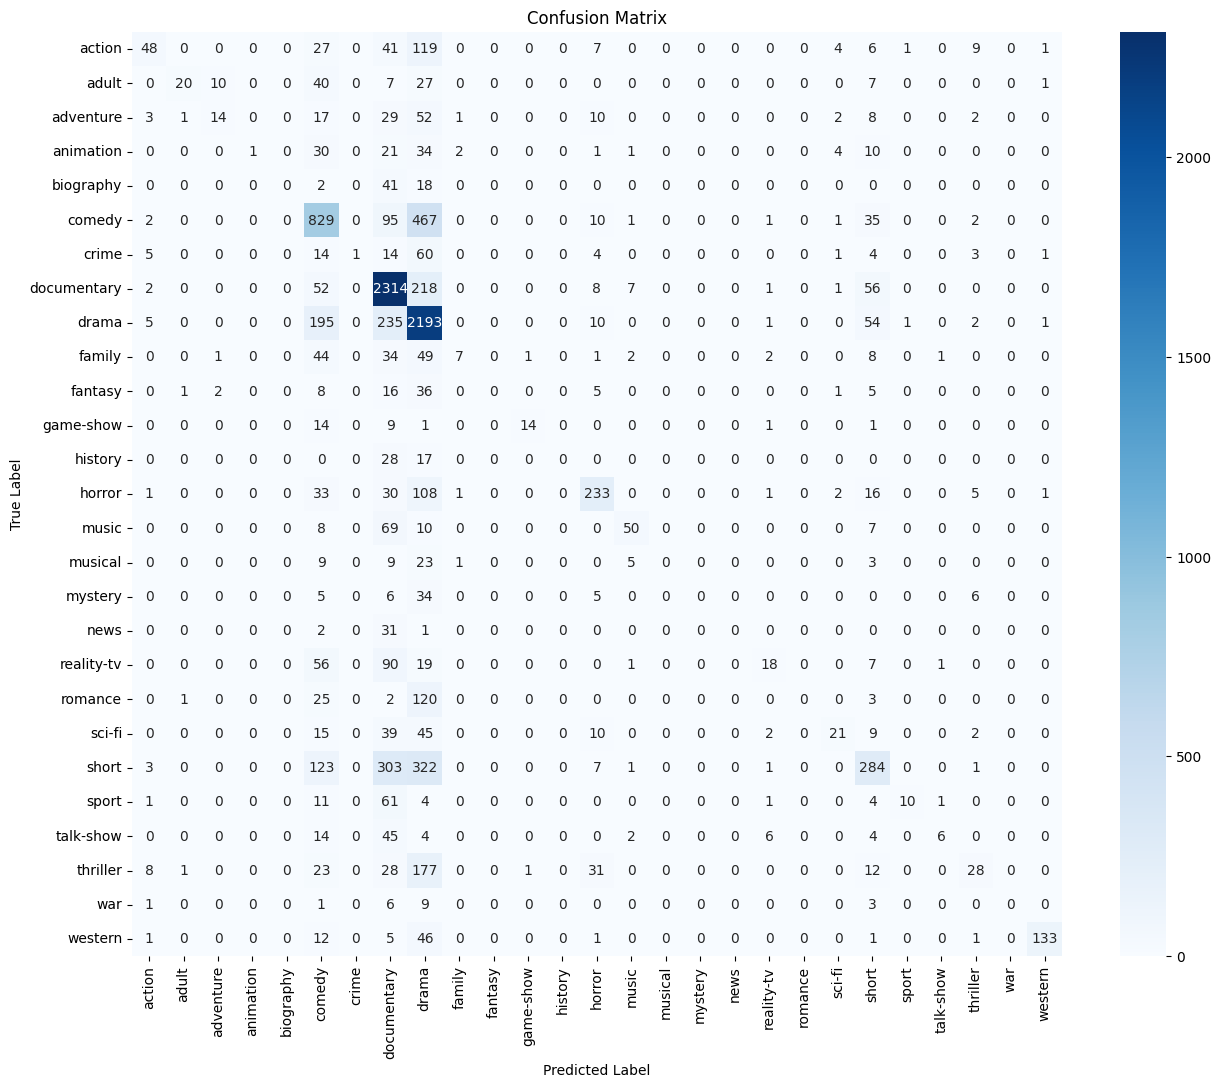

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()